In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

%matplotlib inline

# from sklearn.preprocessing import LabelEncoder
# from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/ghouls,goblin/train.csv").drop('id',axis=1)
test = pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/ghouls,goblin/test.csv")
test_ids = test['id']
test.drop('id',axis=1,inplace=True)

In [3]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 17.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 5 columns):
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), object(1)
memory usage: 20.8+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
gtype = train['type']
train.drop('type',axis=1,inplace=True)
y_train = le.fit_transform(gtype)

In [8]:
y_train

array([1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0,

In [15]:
y_train.shape

(371,)

There are 3 categories in the label, each category has 10 observations



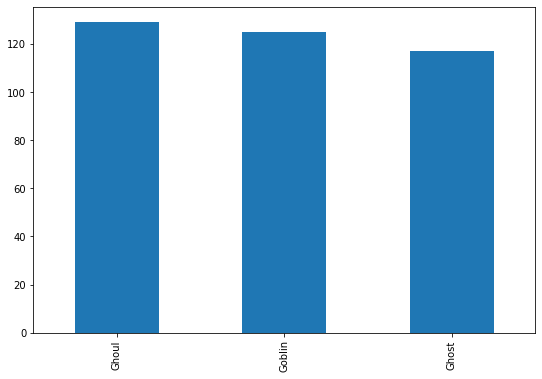

In [9]:
print('There are {} categories in the label, each category has 10 observations\n'.format(len(gtype.unique())))
plt.figure(figsize=(9,6));
gtype.value_counts().plot(kind='bar');

## 데이터가 unbalanced하지 않음을 알 수 있다.

In [10]:
contColumns = train.columns[0:4]
catColumns = ['color']

## 연속형 변수와 명목형 변수를 각각 다른 데이터프레임으로 만듬

In [20]:
def setBoxplot(ax,ylim):
    ax.set_ylim(ylim);
    ax.tick_params(axis='y',labelsize=20,);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=360,fontsize=20);

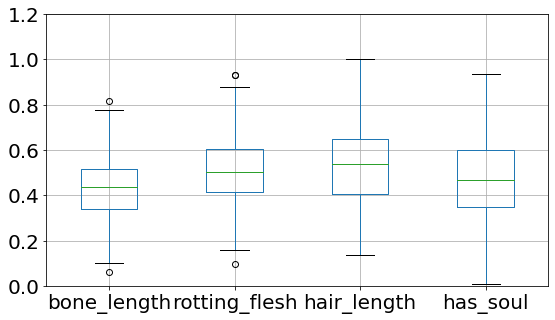

In [21]:
fig = plt.figure(figsize = (9,5));
ax = fig.add_subplot(1,1,1);
train[contColumns].boxplot(whis=1.5);
setBoxplot(ax,[0,1.2])

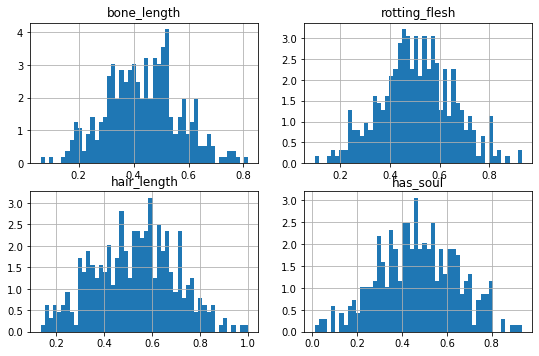

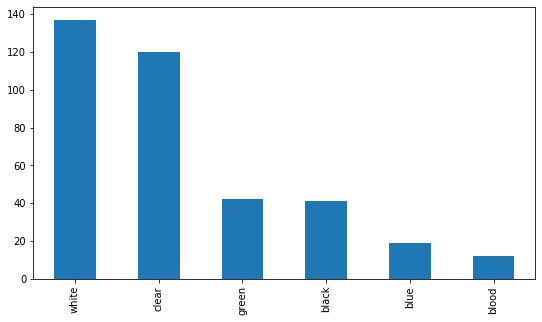

In [22]:
fig=plt.figure(figsize=(9,15))
for i,col in enumerate(train[contColumns]):
    ax = fig.add_subplot(len(train.columns),2,i+1)  # 4개의 subplot을 2x2 matrix 공간에 그림
    train[col].hist(bins=50,normed=True);
    ax.set_title(col)

fig=plt.figure(figsize=(9,5))
for i,col in enumerate(train[catColumns]):
    train[col].value_counts().plot(kind='bar')

In [23]:
def correlation_matrix(df,ax1):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    cmap = cm.get_cmap('RdYlBu', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap, vmin=-1.0, vmax=1.0)
    ax1.grid(True)
    labels = df.columns
    ax1.set_xticks(range(0,len(labels)))
    ax1.set_xticklabels(labels,fontsize=12,rotation=90)
    ax1.set_yticks(range(0,len(labels)))
    ax1.set_yticklabels(labels,fontsize=12)
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=16)
    ax1.grid(b=False)


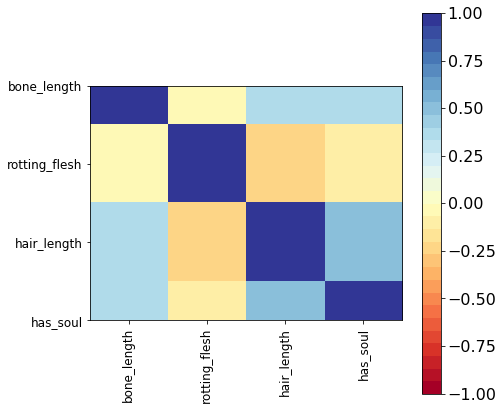

In [24]:
# correlation matrix for margin features
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[contColumns],ax)

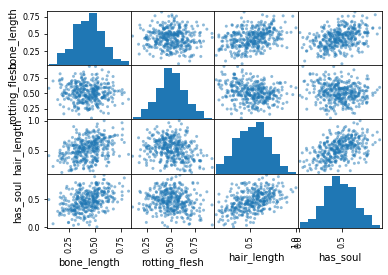

In [26]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(train)
plt.show() # dataset is fairly normalized 

In [27]:
# label encode the categorical features

x_data_df = pd.DataFrame(np.vstack([train,test]),columns = train.columns)
colLes = []
for col in catColumns:
    colLe = LabelEncoder()
    x_data_df[col] = colLe.fit_transform(x_data_df[col])
    colLes.append(colLe)
x_data_df.head()

## color를 name -> integer 로 encording 하고 train,test 를 row로 이어붙임

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,3
1,0.57556,0.425868,0.531401,0.439899,4
2,0.467875,0.35433,0.811616,0.791225,0
3,0.776652,0.508723,0.636766,0.884464,0
4,0.566117,0.875862,0.418594,0.636438,4


# 데이터 전처리

In [28]:
## 범주형 변수들을 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x_cat = ohe.fit_transform(x_data_df[catColumns])
n_x_cat = x_cat
print(n_x_cat.shape)
type(n_x_cat)

## color가 6개의 범주이기 때문에 column이 6개인 matrix가 나옴

(900, 6)


scipy.sparse.csr.csr_matrix

In [31]:
print(n_x_cat)

  (0, 3)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (9, 5)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 5)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 2)	1.0
  (19, 4)	1.0
  (20, 3)	1.0
  (21, 5)	1.0
  (22, 3)	1.0
  (23, 5)	1.0
  (24, 3)	1.0
  :	:
  (875, 0)	1.0
  (876, 3)	1.0
  (877, 5)	1.0
  (878, 3)	1.0
  (879, 3)	1.0
  (880, 3)	1.0
  (881, 3)	1.0
  (882, 5)	1.0
  (883, 5)	1.0
  (884, 0)	1.0
  (885, 3)	1.0
  (886, 0)	1.0
  (887, 3)	1.0
  (888, 5)	1.0
  (889, 3)	1.0
  (890, 5)	1.0
  (891, 2)	1.0
  (892, 5)	1.0
  (893, 4)	1.0
  (894, 5)	1.0
  (895, 2)	1.0
  (896, 3)	1.0
  (897, 5)	1.0
  (898, 3)	1.0
  (899, 5)	1.0


In [33]:
### 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_cont = x_data_df[contColumns].values
n_x_cont = ss.fit_transform(x_cont)
print(n_x_cont.shape)
type(n_x_cont)

(900, 4)


numpy.ndarray

In [34]:
## encording한 data를 합치기 (column으로)
n_x_data = np.hstack([n_x_cont,n_x_cat.toarray()])
print(n_x_data.shape)
n_x_data

(900, 10)


array([[-0.55352147, -1.00416702, -0.33005656, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08789151, -0.51531896,  0.05406109, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.28826969, -0.98141913,  1.69383282, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60476305, -0.04308772,  1.08760456, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72460763,  1.69970305, -1.0764836 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.27917377,  1.21735271, -0.62594951, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
## 데이터 전처리를 끝내고 다시 split
n_x_test = n_x_data[len(gtype):,:]  ## 372~ 900
n_x_train = n_x_data[0:len(gtype),:] ## 1~371

In [36]:
print(n_x_train.shape)
print(y_train.shape)
print(n_x_test.shape)

(371, 10)
(371,)
(529, 10)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'C':[0.001, 0.01, 1, 10, 100, 500, 1000, 2000], 'tol': [0.0001, 0.001, 0.005]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf = GridSearchCV(log_reg, params, refit='True', n_jobs=1, cv=10)
clf.fit(n_x_train, y_train)
## C=1, tol=0.0001 로 best param을 찾음

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 500, 1000, 2000],
                         'tol': [0.0001, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit='True', return_train_score=False,
             scoring=None, verbose=0)

In [43]:
y_test_raw = clf.predict_proba(n_x_test) ## x_test 로 y를 예측한 확률을 df로 만듬
y_test_raw_df = pd.DataFrame(y_test_raw, index=test_ids, columns=le.classes_) ## 위에 것을 index와 합쳐서 DF로 만듬
submission = pd.DataFrame({'id':y_test_raw_df.idxmax(axis=1).index,'type':y_test_raw_df.idxmax(axis=1).values})
## 가장 확률이 높은 class에 할당시켜서 제출용 df를 만듬

submission

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Ghost
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost
